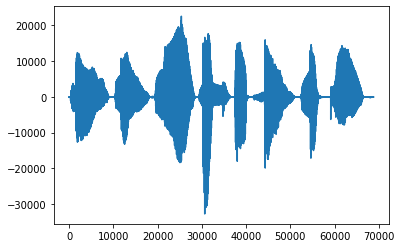

In [117]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read
from scipy import signal
import wave
filename="trais-nayf-mua-ddongs-teepj-phair-mucj-thay.wav"
A=[1,0]
B=[1.0,-0.95]

def divide(arr,N,step):
    l=len(arr)
    n=np.ceil(l/N)
    res=np.array([np.ones(N)],ndmin=2)
    sample=np.array([])
    start=0
    end=0
    while(start<l-1):
        end=start+N
        sample=arr[start:end]
        num=l-start
        if (num<N):
            more=N-num
            for i in range(more):
                sample=np.append(sample,[0])
        res=np.concatenate((res,[sample]),axis=0)
        start+=step
    res=res[1:]
    return res
def get_wav_arr(filename):
    a=read(filename)
    arr=np.array(a[1],dtype=float)
    return arr
def get_rate(filename):
    rate,_=read(filename)
    return rate
def get_N(filename):
    wf=wave.open(filename)
    N=int(wf.getframerate()*0.02) #số frame trong 1 khung
    return N
def get_ZCR(frames):
    M,N= frames.shape
    ZCR=[]
    for i in range(M):
        count=0
        for j in range(N-1):
            if(frames[i][j]*frames[i][j+1]<0):
                count+=1
        ZCR.append(count)
    return ZCR
def get_E(frames):
    M,N= frames.shape
    E=[]
    for i in range(M):
        count=0
        count=sum(frames[i]*frames[i]/M)
        E.append(count)
    return E
def Hamming(N):
    res=[]
    for i in range(N):
        w= 0.53836-0.46164*np.cos(2*np.pi*i/(N-1))
        res.append(w)
    return  res
def get_Fre(frames):
    
    M,N= frames.shape
    f=np.linspace(0,N,N)
    k=np.arange(0,N)
    datap=signal.lfilter(B,A,frames[40],axis=-1,zi=None)
    datah=np.multiply(datap,np.hamming(N))
    amp_spec = np.array([abs(np.sum(datah * np.exp(-1j * 2 * np.pi * fr * k / N))) for fr in f])
    spec_dB = 20 * np.log10(amp_spec / max(amp_spec))
    return spec_dB
def get_F0(frames,frames_num):
    M,N= frames.shape
    K=N/2
    r=np.zeros(N)
    IR=0
    for k in range (int(K-1)):
        r[k]=sum((frames[frames_num][n]*frames[frames_num][n+k])for n in range(0,N-k-1))
        #plt.plot(r)
    max=np.amax(r[30:100])
    if max>300000000:
        IR=np.where(r==max)
        return 1/IR[0]   
    else :
        return 0
    
arr=get_wav_arr(filename)
plt.plot(arr)
plt.show()

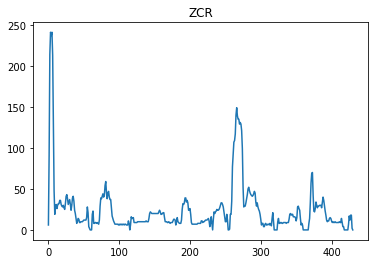

In [118]:
rate=get_rate(filename)
frame_size=get_N(filename)
frames=divide(arr,frame_size,int(frame_size/2))

ZCR=get_ZCR(frames)
plt.plot(ZCR)
plt.title("ZCR")
plt.show()

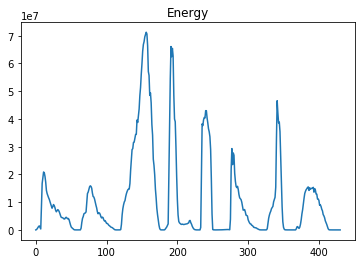

In [119]:
E=get_E(frames)
plt.plot(E)
plt.title("Energy")
plt.show()

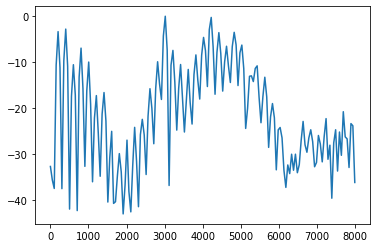

In [120]:
spec_dB=get_Fre(frames)
frequency = np.linspace(0, rate//2, num = frame_size//2)
plt.plot(frequency, spec_dB[0:frame_size//2], linewidth = 1.5)

0
0
0
0
0
0
0
0
[0.01538462]
[0.01449275]
[0.01408451]
[0.01369863]
[0.01333333]
[0.01282051]
[0.01265823]
[0.01234568]
[0.01219512]
[0.01204819]
[0.01176471]
[0.01176471]
[0.01162791]
[0.01149425]
[0.01149425]
[0.01149425]
[0.01136364]
[0.01136364]
[0.01149425]
[0.01136364]
[0.01149425]
[0.01149425]
[0.01149425]
[0.01149425]
[0.01162791]
[0.01162791]
[0.01162791]
[0.01162791]
[0.01190476]
[0.01204819]
[0.01219512]
[0.01234568]
[0.0125]
[0.01282051]
[0.01315789]
[0.01351351]
[0.01408451]
[0.01449275]
[0.01515152]
[0.015625]
[0.01639344]
[0.01724138]
[0.01851852]
0
0
0
0
0
0
0
0
0
0
0
0
0
0
[0.01408451]
[0.01351351]
[0.01351351]
[0.01333333]
[0.01333333]
[0.01315789]
[0.01298701]
[0.01298701]
[0.01265823]
[0.0125]
[0.01234568]
[0.01219512]
[0.01219512]
[0.01204819]
[0.01204819]
[0.01204819]
[0.01190476]
[0.01176471]
[0.01176471]
[0.01162791]
[0.01162791]
[0.01149425]
[0.01136364]
[0.01136364]
[0.01136364]
[0.01123596]
[0.01123596]
[0.01111111]
[0.01111111]
[0.01098901]
[0.01086957]
[0.0

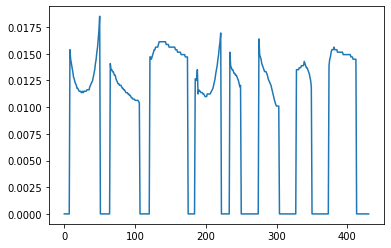

In [121]:
M,N=frames.shape
F0=[]
for i in range(M):
    rk=get_F0(frames,i)
    print(rk)
    F0.append((rk))
plt.plot(F0)